## **Airlines Flights Dataset for Different Cities**<br>
    The Flights Booking Dataset of various Airlines is a scraped datewise from a famous website in a structured format. The dataset contains the records of flight travel details between the cities in India. Here, multiple features are present like Source & Destination City, Arrival & Departure Time, Duration & Price of the flight etc.
    This data is available as a CSV file. We are going to analyze this data set using the Pandas DataFrame.
    This analyse will be helpful for those working in Airlines, Travel domain.

## **These are the main Features/Columns available in the dataset :**

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

In [38]:
from scipy.stats import chi2_contingency,f_oneway  
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,ShuffleSplit

In [39]:
df="/kaggle/input/airlines-flights-data/airlines_flights_data.csv"

In [40]:
airline_df=pd.read_csv(df)
airline_df.sample(7)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
251705,251705,Vistara,UK-814,Bangalore,Night,one,Morning,Mumbai,Business,12.58,36,69244
134590,134590,Indigo,6E-6172,Kolkata,Night,one,Early_Morning,Mumbai,Economy,8.33,44,3381
148183,148183,Air_India,AI-768,Kolkata,Afternoon,one,Afternoon,Chennai,Economy,21.17,3,17094
90122,90122,GO_FIRST,G8-803,Bangalore,Evening,one,Night,Delhi,Economy,4.67,31,4456
66046,66046,Indigo,6E-5302,Mumbai,Morning,one,Afternoon,Kolkata,Economy,4.58,27,4132
115629,115629,Air_India,AI-503,Bangalore,Evening,one,Evening,Chennai,Economy,25.17,2,14524
219512,219512,Air_India,AI-877,Delhi,Morning,one,Afternoon,Hyderabad,Business,25.42,9,37668


In [41]:
airline_df.shape

(300153, 12)

## **EDA and Analysis**

In [42]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


## **Descriptive Statistics**

**The descriptive_analysis function performs a detailed statistical summary and outlier analysis on selected numerical columns of a DataFrame.**<br>

**Function Purpose**
* *Generate descriptive statistics (like mean, min, percentiles)*.<br>

* *Add shape-related statistics: skewness and kurtosis.*<br>

* *Detect and count outliers using the IQR method.*<br>

In [43]:
def descriptive_analysis(dataset:pd.DataFrame,n_cols):
    stats_df=dataset[n_cols].describe(percentiles=[0.25,0.5,0.75,0.95,0.99])

    stats_df.loc["skew"]=dataset[n_cols].skew() #adding skewness
    stats_df.loc["kurtosis"]=dataset[n_cols].kurtosis() #adding kurtosis

    #Detect outlier(IQR method)
    q1= dataset[n_cols].quantile(0.25)
    q3=dataset[n_cols].quantile(0.75)
    IQR=q3 - q1

    outlier_dect=((dataset[n_cols] < (q1 -1.5*IQR)) | (dataset[n_cols] > (q3 + 1.5 * IQR)))
    outlier_count = outlier_dect.sum().rename('outlier_count')
    stats_df =pd.concat([stats_df,outlier_count.to_frame().T])
    return stats_df 
num_cols =["index","duration","days_left","price"]
num_stats=descriptive_analysis(airline_df,num_cols)
print(num_stats)

                       index       duration      days_left          price
count          300153.000000  300153.000000  300153.000000  300153.000000
mean           150076.000000      12.221021      26.004751   20889.660523
std             86646.852011       7.191997      13.561004   22697.767366
min                 0.000000       0.830000       1.000000    1105.000000
25%             75038.000000       6.830000      15.000000    4783.000000
50%            150076.000000      11.250000      26.000000    7425.000000
75%            225114.000000      16.170000      38.000000   42521.000000
95%            285144.400000      25.920000      47.000000   63277.000000
99%            297150.480000      29.080000      49.000000   76736.000000
max            300152.000000      49.830000      49.000000  123071.000000
skew                0.000000       0.602899      -0.035464       1.061377
kurtosis           -1.200000      -0.268996      -1.156215      -0.396293
outlier_count       0.000000    2110.0

## **Distribution & Outlier Visualization**

**The plot_numerical_distribution function visualizes the distribution and potential outliers of multiple numerical columns in a DataFrame using histograms with KDE and boxplots.**

**Function Purpose**<br>
1. *Visually explore the distribution shape (normal, skewed, bimodal, etc.).*<br>

2. *Identify outliers using boxplots.*<br>

3. *Helps in EDA (Exploratory Data Analysis) for numerical features.*<br>

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


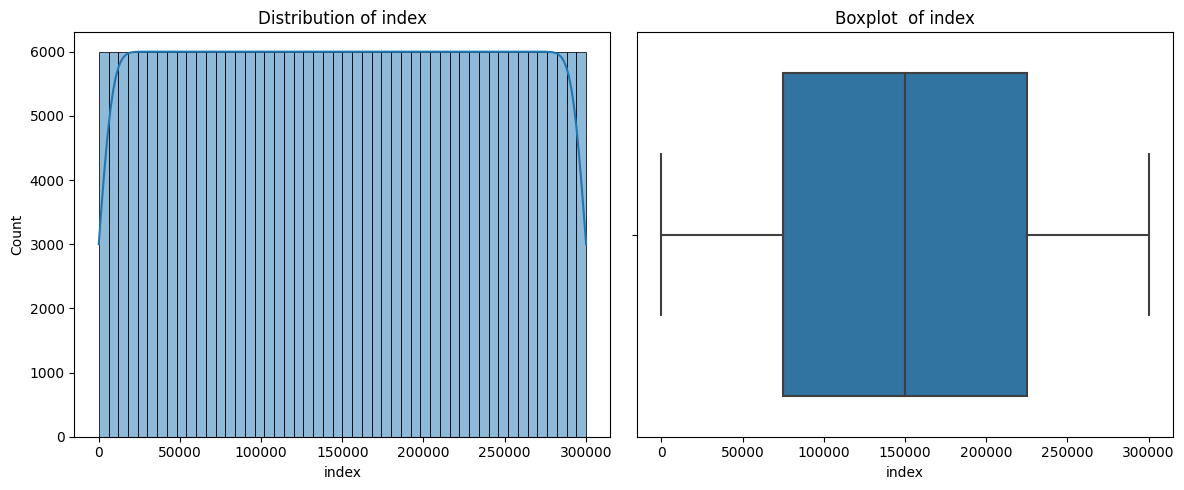

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


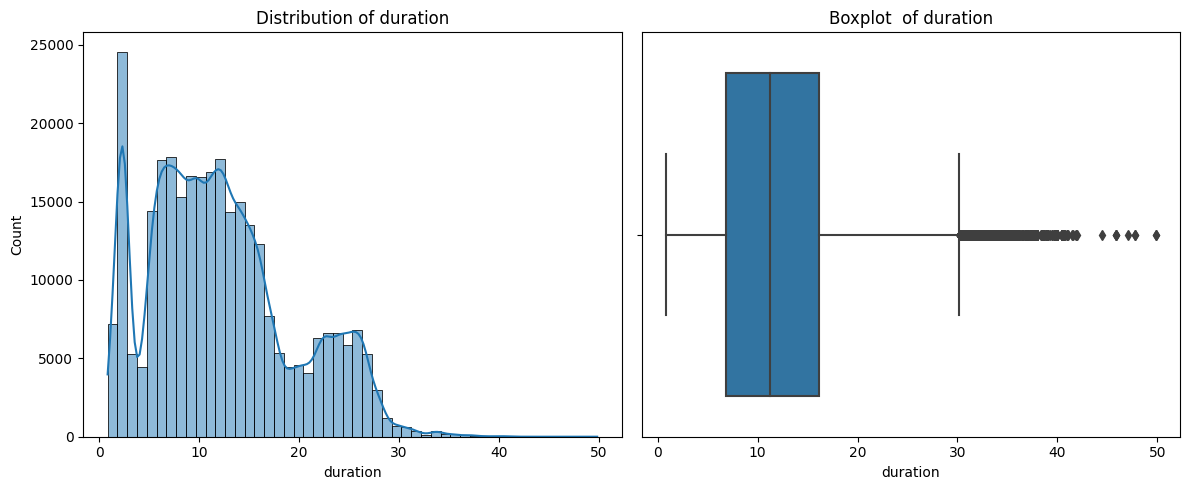

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


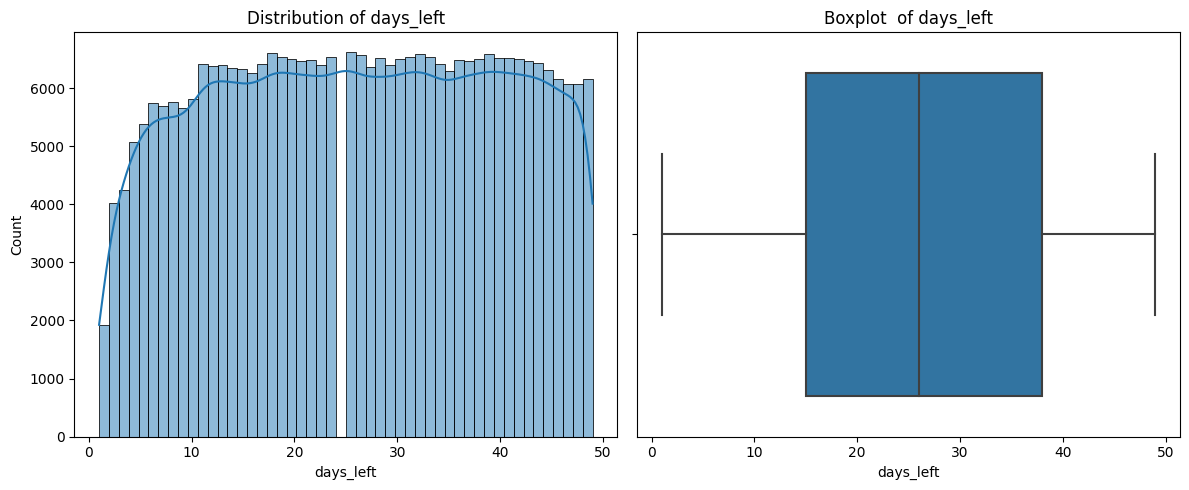

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


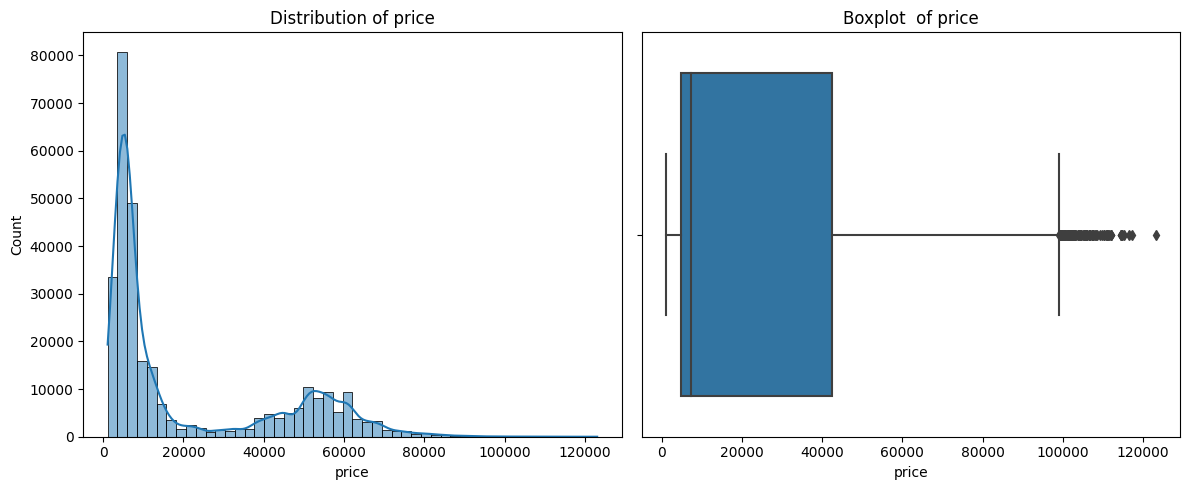

In [44]:
def plot_numerical_distribution(df,num_cols):
    for col in num_cols:
        plt.figure(figsize=(12,5))

        #hist +kde
        plt.subplot(1,2,1)
        sns.histplot(df[col],kde =True,bins=50)
        plt.title(f"Distribution of {col}")

        #outlier
        plt.subplot(1,2,2)
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot  of {col}")
        plt.tight_layout()
        plt.show()
plot_numerical_distribution(airline_df,num_cols)

## **Correlation Analysis**

**The plot_Correlation_matrix function computes and visualizes the correlation matrix for a given set of numerical columns using the Spearman rank correlation method.**

**Function Purpose**<br>
1. *Identify how strongly pairs of numerical features are monotonically related.*<br>

2. *Help detect redundant features and multicollinearity.*<br>

3. *Visual aid for understanding feature interactions.*

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


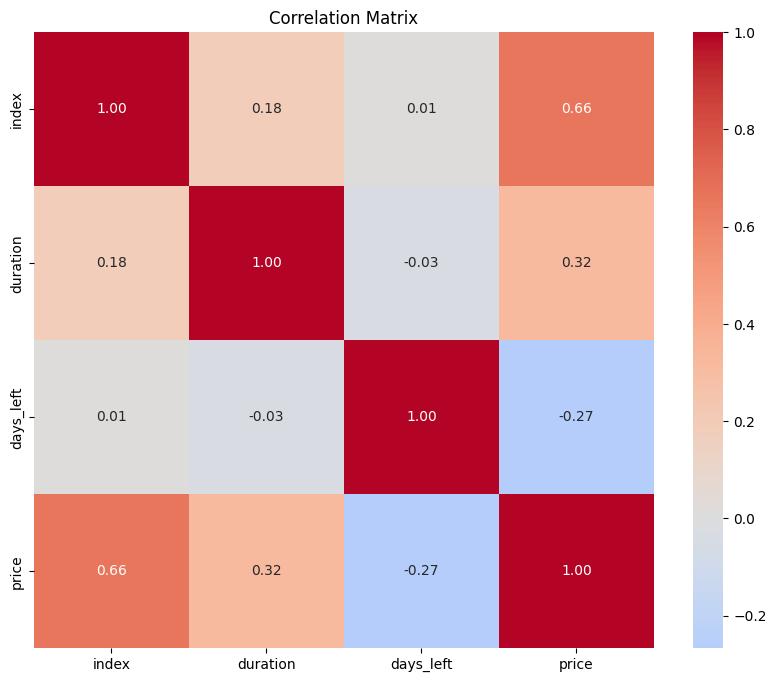

In [45]:
def plot_Correlation_matrix(df,n_cols):
    corr_m=df[n_cols].corr(method="spearman")
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_m,annot=True,cmap="coolwarm",center=0,fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()
plot_Correlation_matrix(airline_df,num_cols)

## **Frequency Analysis**

**The Freq_analysis function performs a frequency (count) analysis of the most common categories in each categorical column and visualizes them using bar plots.**

**Function Purpose**<br>
1. *Identify the most frequent categories in each categorical column.*<br>

2. *Visualize category distributions to understand dominance or imbalance.*<br>

3. *Useful for EDA on categorical features.*

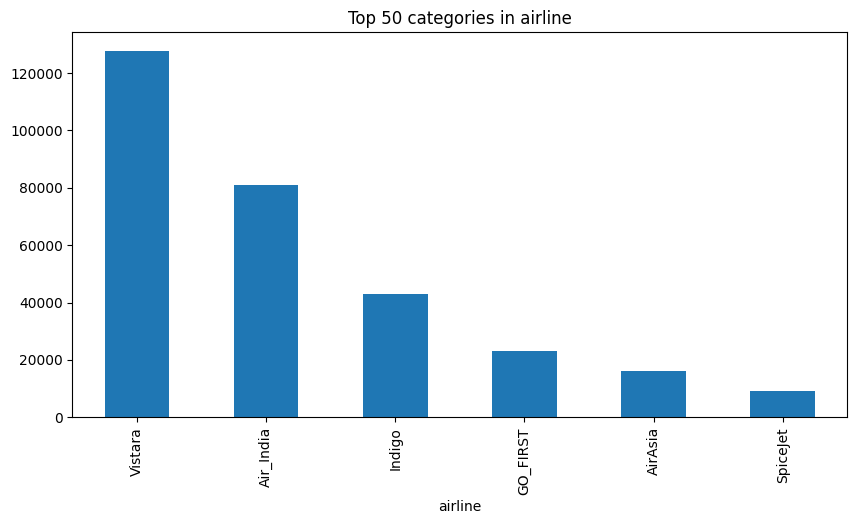

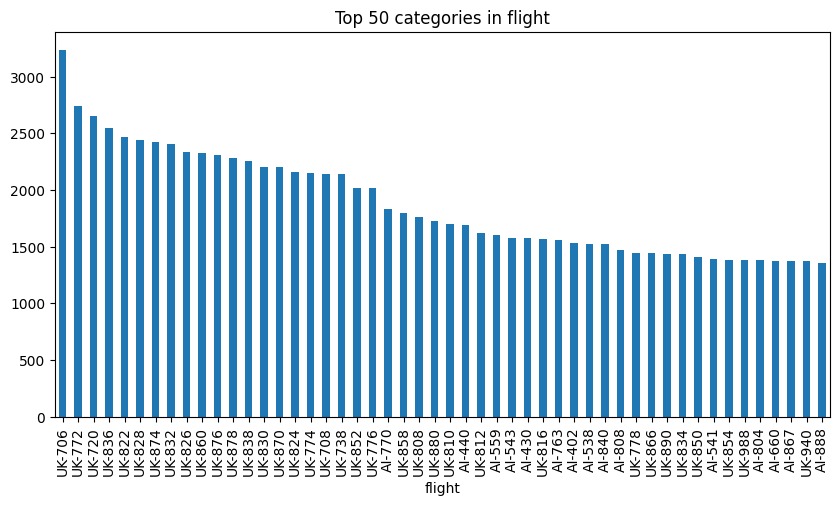

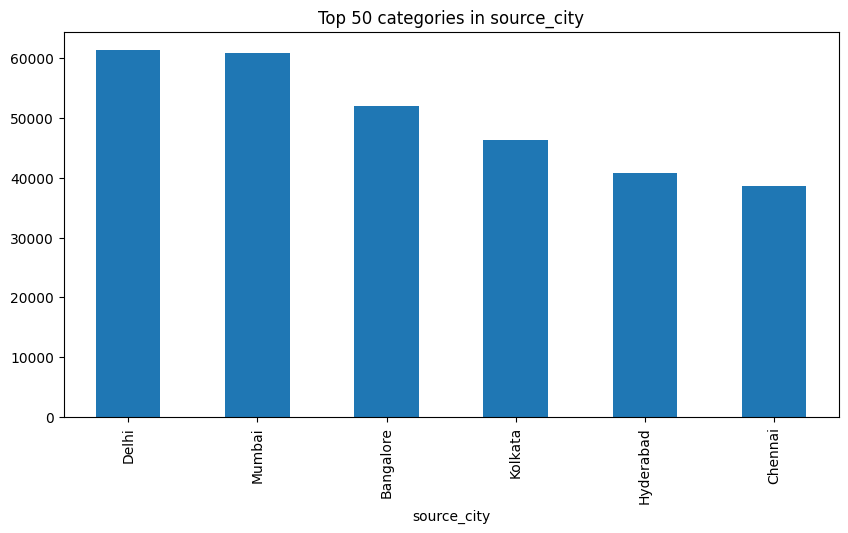

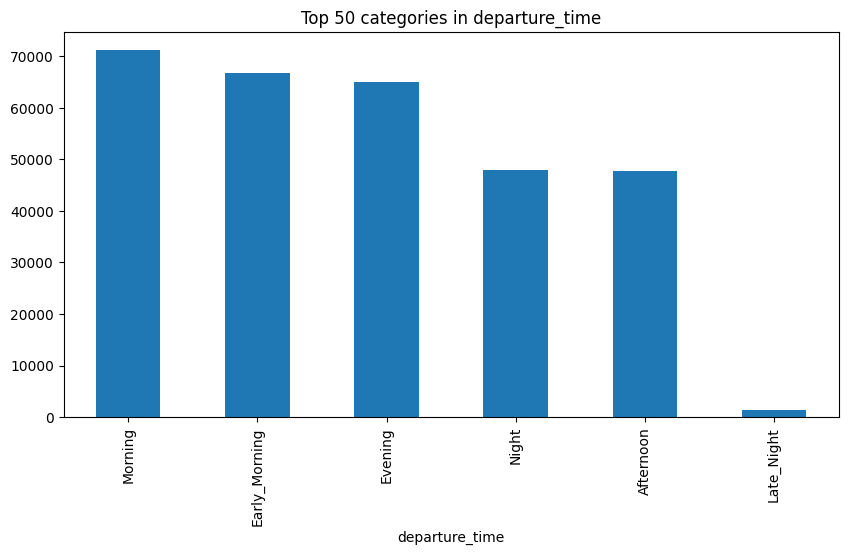

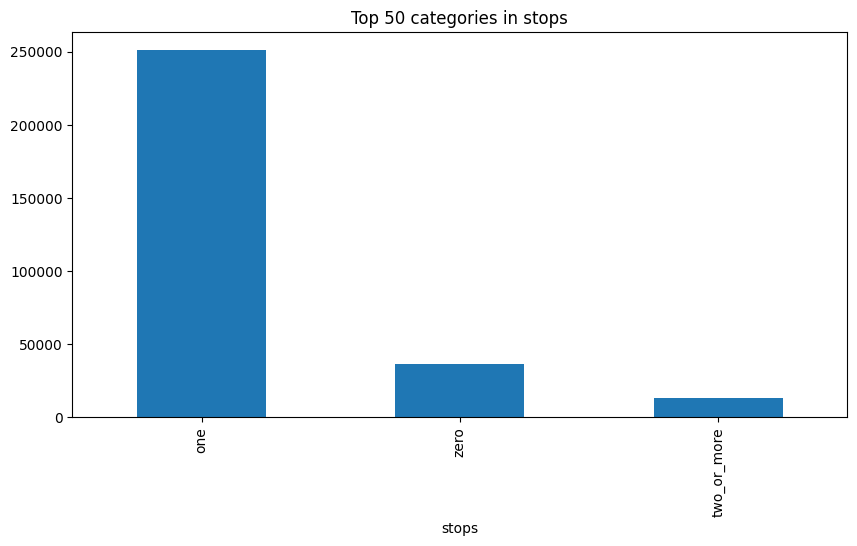

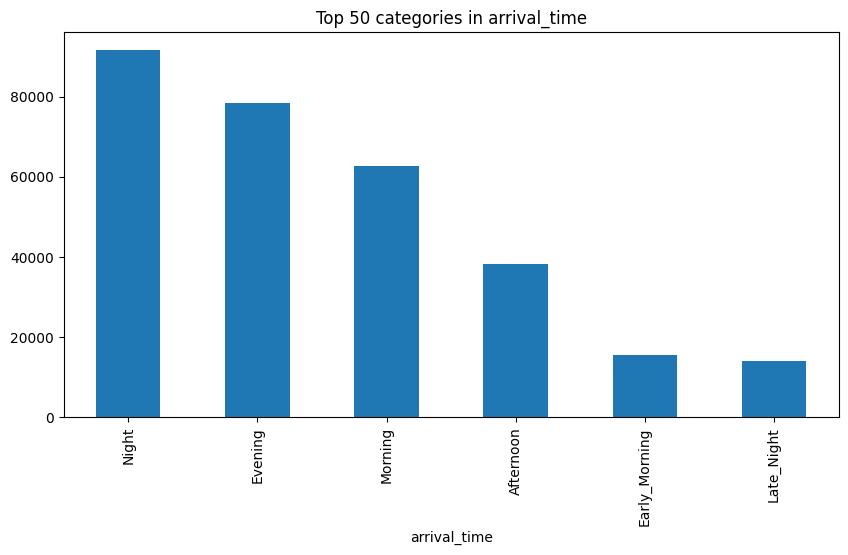

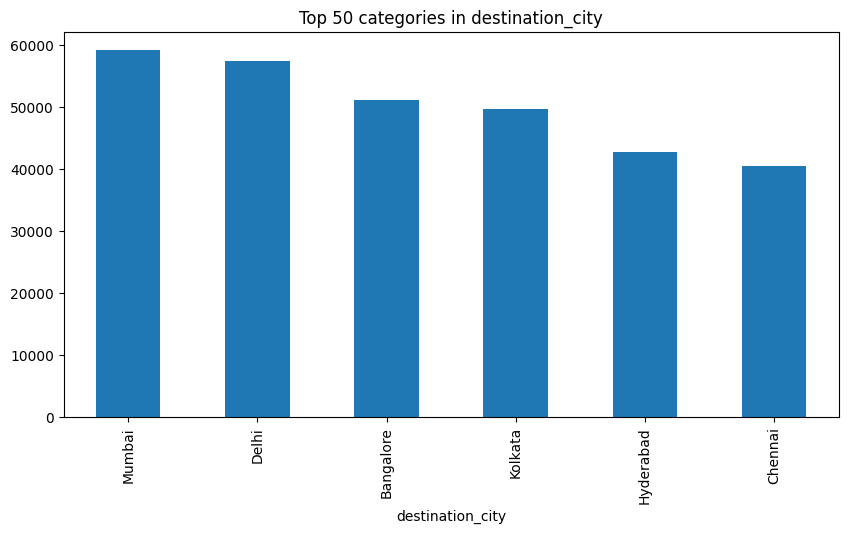

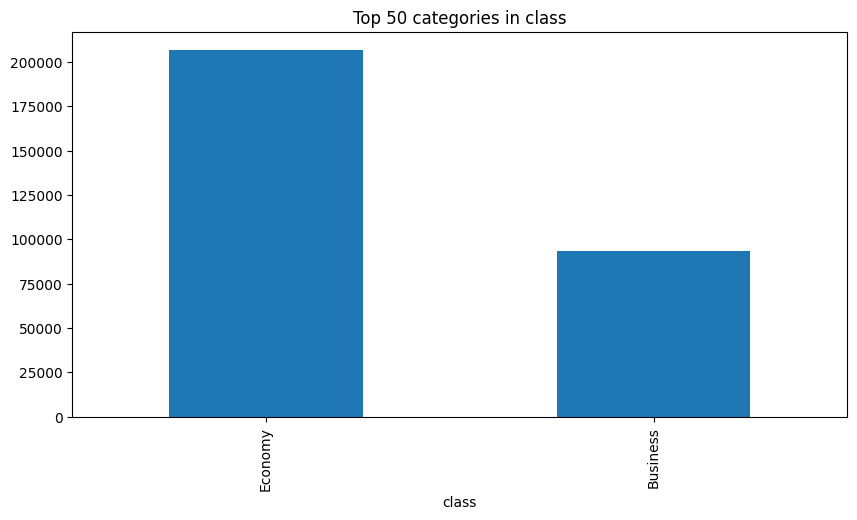

In [46]:
def Freq_analysis(df:pd.DataFrame,cat_columns,top_n:int=50):
    for col in cat_columns:
        freq=df[col].value_counts().nlargest(top_n)

        #Plot
        plt.figure(figsize=(10,5))
        freq.plot(kind="bar")
        plt.title(f"Top {top_n} categories in {col}")
        plt.xticks(rotation=90)
        plt.show()
cat_cols=airline_df.select_dtypes(include=["object"]).columns
Freq_analysis(airline_df,cat_cols)

## **Cardinality & Rare Categories**

**The analyze_cardinality function is used to analyze the cardinality (i.e., the number of unique values) of categorical columns in a pandas DataFrame and detect rare categories based on a specified threshold.**

In [47]:
def analyze_cardinality(df,cat_cols,rare_threshold=0.01):
    cardinality_report={}
    for col in cat_cols:
        n_unique=df[col].nunique()
        freq=df[col].value_counts(normalize=True)
        rare_cats=freq[freq <rare_threshold].index.tolist()
        cardinality_report[col]={
            'N_unique': n_unique,
            "Rare_categories":rare_cats,
            "Sugesstion":"Drop or bin rare categories" if rare_cats else "OK"
        }
    return pd.DataFrame(cardinality_report).T
# cat_cols=["airline","flight","source_city","departure_time","stops","arrival_time","destination_city","class"]
cardinality_report=analyze_cardinality(airline_df,cat_cols)
print(cardinality_report)

                 N_unique                                    Rare_categories  \
airline                 6                                                 []   
flight               1561  [UK-772, UK-720, UK-836, UK-822, UK-828, UK-87...   
source_city             6                                                 []   
departure_time          6                                       [Late_Night]   
stops                   3                                                 []   
arrival_time            6                                                 []   
destination_city        6                                                 []   
class                   2                                                 []   

                                   Sugesstion  
airline                                    OK  
flight            Drop or bin rare categories  
source_city                                OK  
departure_time    Drop or bin rare categories  
stops                                  

## **Chi-Square Test (Categorical Associations)**

**The Chi-Square Test (χ² test) is a statistical test used to determine whether there is a significant association between two categorical variables.**

**If there's a strong association (in a Chi-Square test), it means:<br>
The two categorical variables are not independent — they influence each other.**

In [48]:
def chi_square_test(df,cat1,cat2):
    contingency_table=pd.crosstab(df[cat1],df[cat2])
    chi2,p,dof,expected=chi2_contingency(contingency_table)
    n=contingency_table.sum().sum()
    cramers_v =np.sqrt(chi2/n*(min(contingency_table.shape)-1))
    return {
        "Chi2_stat":chi2,
        "p_value":p,
        "Cramers_v": cramers_v,
        "interpretation":"Strong association" if cramers_v >0.25 else "Weak/moderate"
    }
result=chi_square_test(airline_df,"airline","source_city")
print("checking relation between airlines and source_city :",result)

checking relation between airlines and source_city : {'Chi2_stat': 5740.747763040632, 'p_value': 0.0, 'Cramers_v': 0.3092415850132074, 'interpretation': 'Strong association'}


In [49]:
result=chi_square_test(airline_df,"airline","flight")
print("checking relation between airlines and flight :",result)

checking relation between airlines and flight : {'Chi2_stat': 1500765.0, 'p_value': 0.0, 'Cramers_v': 5.0, 'interpretation': 'Strong association'}


In [50]:
result=chi_square_test(airline_df,"airline","departure_time")
print("checking relation between airlines and departure_time :",result)

checking relation between airlines and departure_time : {'Chi2_stat': 9762.999143131447, 'p_value': 0.0, 'Cramers_v': 0.4032786991570907, 'interpretation': 'Strong association'}


In [51]:
result=chi_square_test(airline_df,"airline","stops")
print("checking relation between airlines and arrival_time :",result)

checking relation between airlines and arrival_time : {'Chi2_stat': 18166.156417759023, 'p_value': 0.0, 'Cramers_v': 0.34791662220130387, 'interpretation': 'Strong association'}


In [52]:
result=chi_square_test(airline_df,"airline","arrival_time")
print("checking relation between airlines and arrival_time :",result)

checking relation between airlines and arrival_time : {'Chi2_stat': 28932.298024552056, 'p_value': 0.0, 'Cramers_v': 0.6942327908563802, 'interpretation': 'Strong association'}


In [53]:
result=chi_square_test(airline_df,"airline","destination_city")
print("checking relation between airlines and destination_city :",result)

checking relation between airlines and destination_city : {'Chi2_stat': 6283.156376870961, 'p_value': 0.0, 'Cramers_v': 0.3235210863950676, 'interpretation': 'Strong association'}


In [54]:
result=chi_square_test(airline_df,"airline","class")
print("checking relation between airlines and class :",result)

checking relation between airlines and class : {'Chi2_stat': 60492.80487209428, 'p_value': 0.0, 'Cramers_v': 0.44893195203641467, 'interpretation': 'Strong association'}


## **Combined Analysis**
* 1. Grouped Aggregations

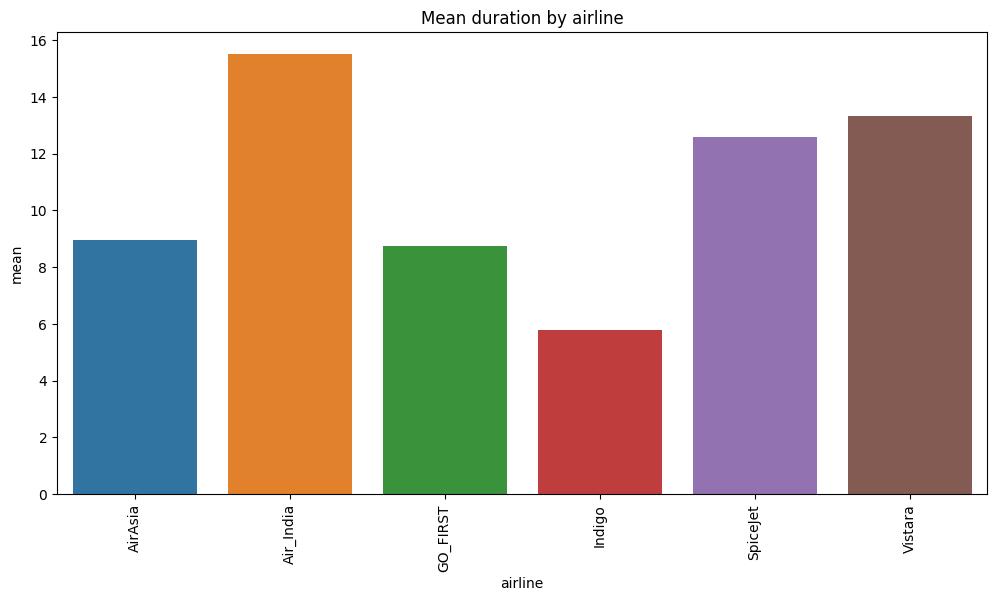

,mean,median,std,count
airline,,,,
AirAsia,8.941714,9.33,4.173152,16098
Air_India,15.504235,15.00,7.613365,80892
GO_FIRST,8.755380,8.83,4.015146,23173
Indigo,5.795197,6.00,2.769322,43120
SpiceJet,12.579767,12.00,8.927157,9011
Vistara,13.326634,12.50,6.777230,127859


In [55]:
def plot_grouped_stats(df,num_col,cat_col):
    grouped=df.groupby(cat_col)[num_col].agg(['mean',"median","std","count"])

    plt.figure(figsize=(12,6))
    sns.barplot(x=grouped.index,y=grouped["mean"])
    plt.title(f"Mean {num_col} by {cat_col}")
    plt.xticks(rotation=90)
    plt.show()
    return grouped
plot_grouped_stats(airline_df,"duration","airline")

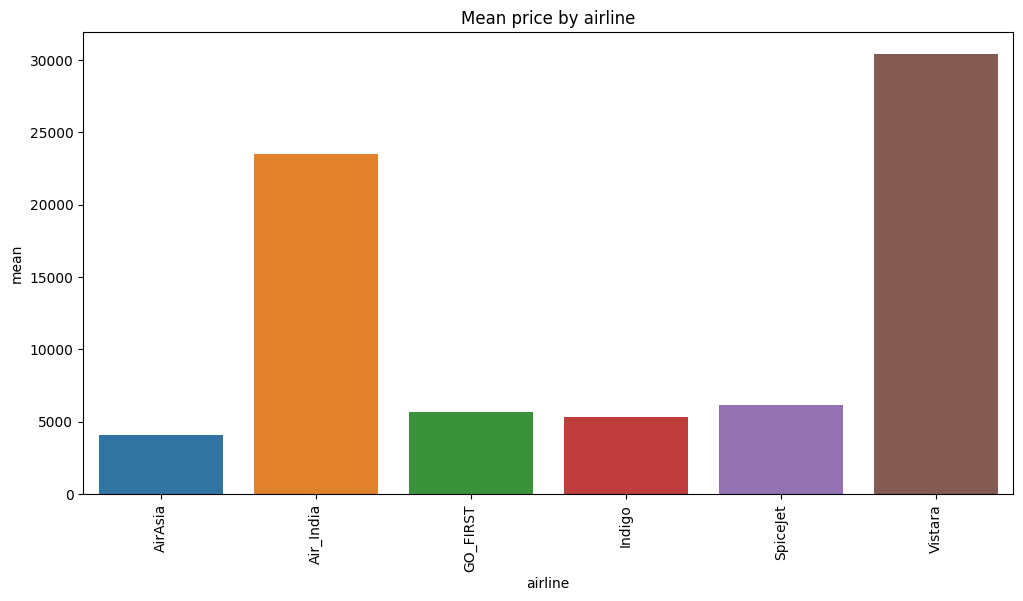

,mean,median,std,count
airline,,,,
AirAsia,4091.072742,3276.0,2824.055172,16098
Air_India,23507.019112,11520.0,20905.116909,80892
GO_FIRST,5652.007595,5336.0,2513.865560,23173
Indigo,5324.216303,4453.0,3268.894831,43120
SpiceJet,6179.278881,5654.0,2999.630406,9011
Vistara,30396.536302,15543.0,25637.159445,127859


In [56]:
plot_grouped_stats(airline_df,"price","airline")

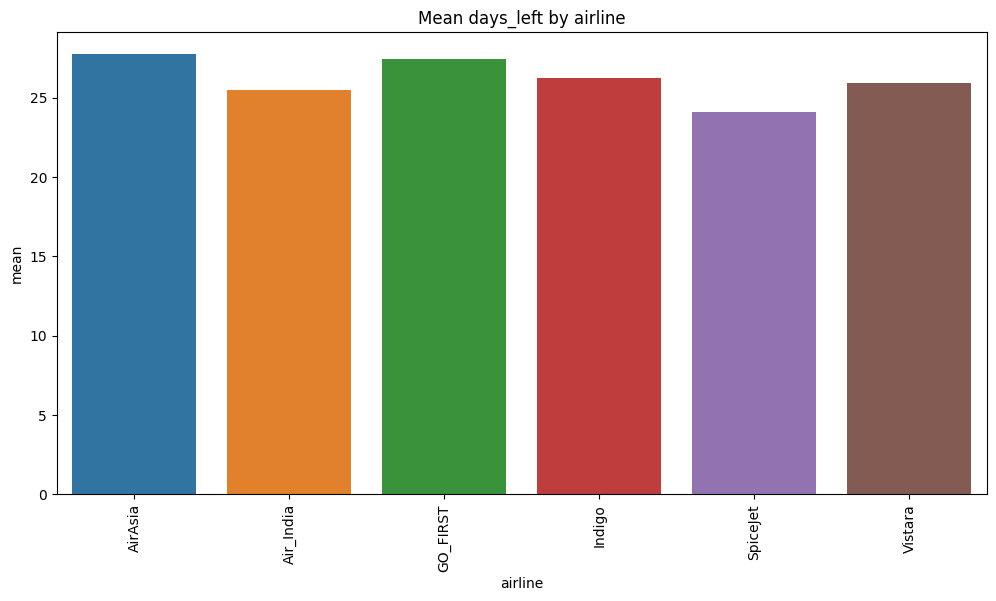

,mean,median,std,count
airline,,,,
AirAsia,27.735184,28.0,12.889223,16098
Air_India,25.497466,26.0,13.725776,80892
GO_FIRST,27.430415,27.0,12.385957,23173
Indigo,26.264309,27.0,13.717115,43120
SpiceJet,24.122850,23.0,13.658816,9011
Vistara,25.894532,26.0,13.638537,127859


In [57]:
plot_grouped_stats(airline_df,"days_left","airline")

**2. ANOVA (Numerical Differences Across Categories)** 

**ANOVA (Analysis of Variance) is a statistical method used to compare the means of three or more groups to determine if at least one group mean is significantly different from the others.**

**What Does “Significant Difference” Mean (in ANOVA or any test)?<br>
        It means the difference you observed in the group means is unlikely to have occurred by random chance.**

In [58]:
def anova_test(df,num_cols,cat_cols):
    groups =df.groupby(cat_cols)[num_cols].apply(list)
    f_stat,p_value =f_oneway(*groups)
    return {
        'f_statistic': f_stat,
        "p_value":p_value,
        'interpretation': "Significant difference" if p_value <0.05 else "No significant difference"
    }
anova_result=anova_test(airline_df,"price","airline") #Anova test between price and airline
print("Anova test between price and airline :",anova_result)

Anova test between price and airline : {'f_statistic': 17194.402096092348, 'p_value': 0.0, 'interpretation': 'Significant difference'}


In [59]:
anova_result=anova_test(airline_df,"days_left","airline") 
print("Anova test between days_left and airline :",anova_result)

Anova test between days_left and airline : {'f_statistic': 166.2973097418532, 'p_value': 3.15495068283172e-177, 'interpretation': 'Significant difference'}


In [60]:
anova_result=anova_test(airline_df,"duration","airline") 
print("Anova test between duration and airline :",anova_result)

Anova test between duration and airline : {'f_statistic': 15963.552828148688, 'p_value': 0.0, 'interpretation': 'Significant difference'}


In [61]:
anova_result=anova_test(airline_df,"index","airline") 
print("Anova test between index and airline :",anova_result)

Anova test between index and airline : {'f_statistic': 11029.958344972356, 'p_value': 0.0, 'interpretation': 'Significant difference'}


## **Advanced Preprocessing**

**Handling Outliers (Winsorization)**

In [62]:
def Winsorization_col(df,column,lower:float=0.05,upper:float=0.95):
    for col in column:
        lower_bound=df[col].quantile(lower)
        upper_bound=df[col].quantile(upper)
        df[col] = df[col].clip(lower_bound,upper_bound)
    return df
df=Winsorization_col(airline_df,["duration","price"])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


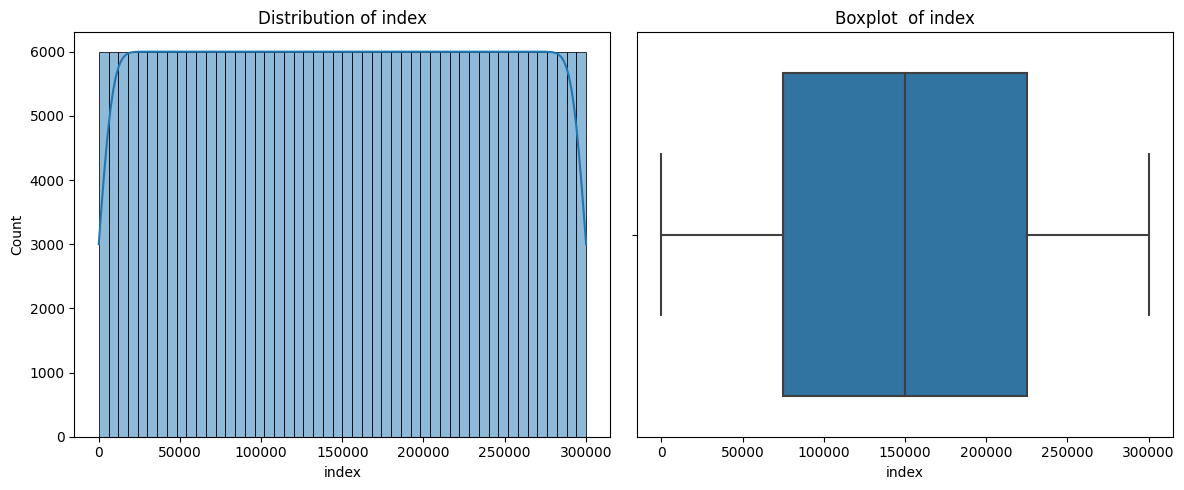

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


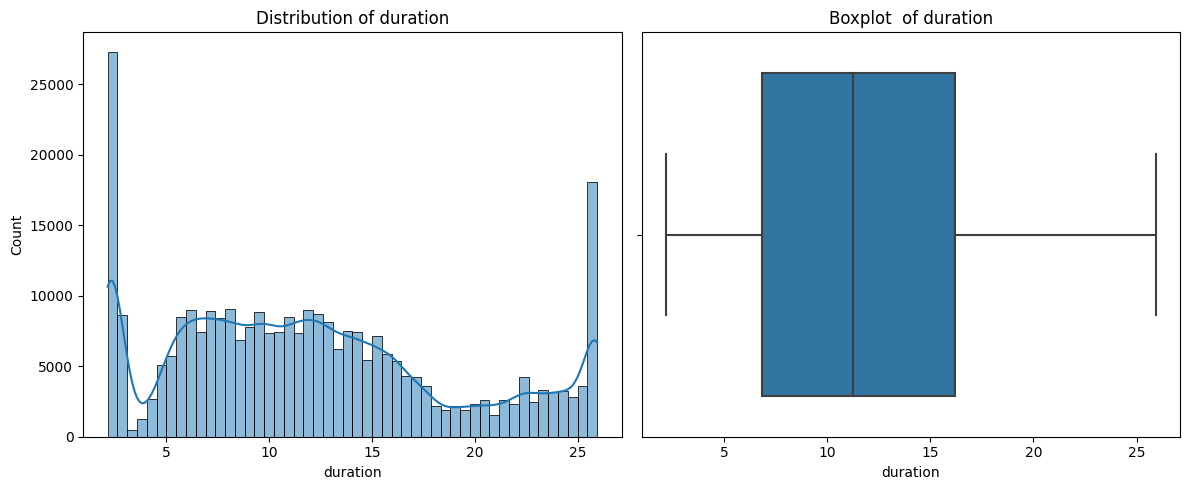

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


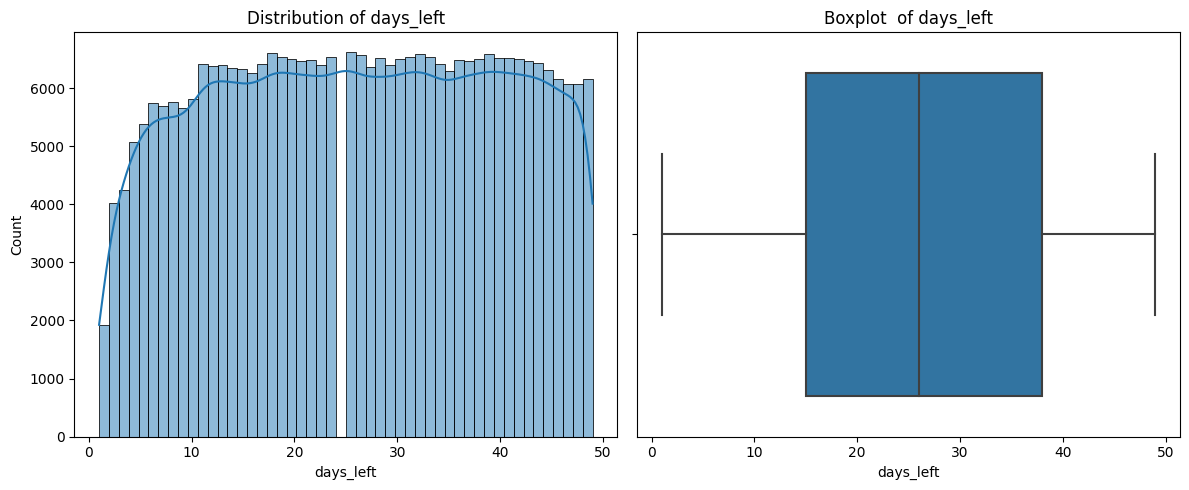

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


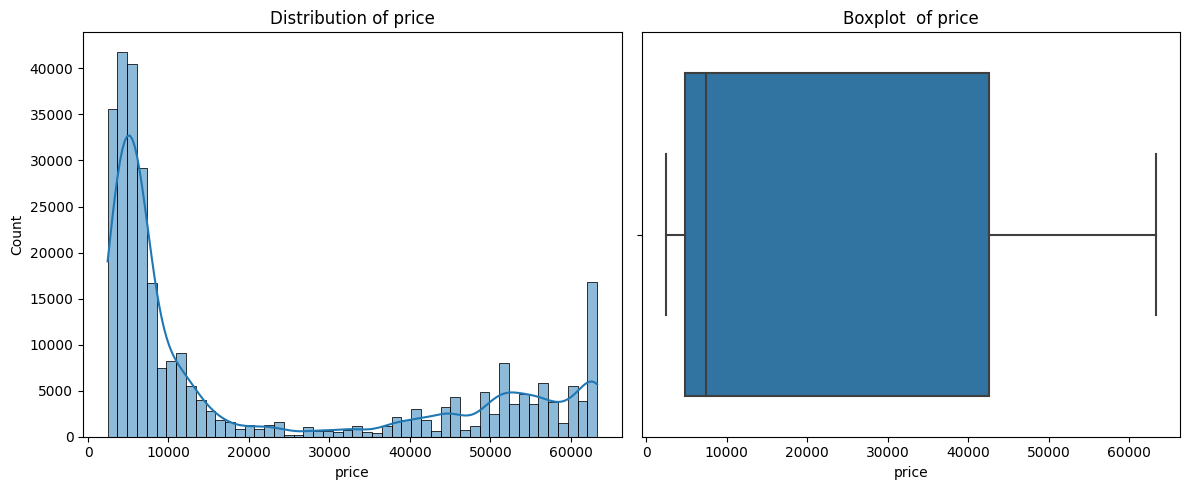

In [63]:
num_cols =["index","duration","days_left","price"]
plot_numerical_distribution(df,num_cols)

**Encoding Categorical Variables**

In [64]:
def label_encoding(df:pd.DataFrame,cat_cols):
    for col in cat_cols:
        df[col]=LabelEncoder().fit_transform(df[col])
    return df
df=label_encoding(df,cat_cols)

## **Now Making model to predict Airlines available(Multi-Class Classification)**

In [66]:
x=df.drop(columns=["airline"])
y=df["airline"]

In [67]:
x.shape,y.shape

((300153, 11), (300153,))

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train shape :",x_train.shape,"==","y_train shape :",y_train.shape)
print("x_test shape :",x_test.shape,"==","y_test shape :",y_test.shape)

x_train shape : (240122, 11) == y_train shape : (240122,)
x_test shape : (60031, 11) == y_test shape : (60031,)


In [69]:
class ModelSelection:
    def __init__(self,x_train,y_train,x_test,y_test):
        self.xtrain=x_train
        self.xtest=x_test
        self.ytrain=y_train
        self.ytest=y_test
        
        from  sklearn.neighbors import KNeighborsClassifier
        self.knn=KNeighborsClassifier(6)

        from  sklearn.linear_model import LogisticRegression
        self.lr=LogisticRegression(multi_class='multinomial', solver='lbfgs')

        from sklearn.tree import DecisionTreeClassifier
        self.dtc=DecisionTreeClassifier()

        from sklearn.ensemble import RandomForestClassifier
        self.rfc=RandomForestClassifier(n_estimators=100)
        
        from catboost import CatBoostClassifier
        self.cat = CatBoostClassifier(loss_function='MultiClass')
        
        from sklearn.svm import SVC
        self.svc = SVC(kernel='rbf', decision_function_shape='ovr')
    def choseModel(self):
        KNN=self.knn.fit(self.xtrain,self.ytrain)
        knn_train_sc=KNN.score(self.xtrain,self.ytrain)
        knn_test_sc=KNN.score(self.xtest,self.ytest)

        LR=self.lr.fit(self.xtrain,self.ytrain)
        lr_train_sc=LR.score(self.xtrain,self.ytrain)
        lr_test_sc=LR.score(self.xtest,self.ytest)

        DTC=self.dtc.fit(self.xtrain,self.ytrain)
        dtc_train_sc=DTC.score(self.xtrain,self.ytrain)
        dtc_test_sc=DTC.score(self.xtest,self.ytest)

        RFC=self.rfc.fit(self.xtrain,self.ytrain)
        RFC_train_sc=RFC.score(self.xtrain,self.ytrain)
        RFC_test_sc=RFC.score(self.xtest,self.ytest)


        model_select ={
            "Models":["KNN","Logistic Regression","DecisionTreeClassifier","RandomForestClassifier"],
            "Train_sc":[knn_train_sc,lr_train_sc,dtc_train_sc,RFC_train_sc],
            "Test_sc":[knn_test_sc,lr_test_sc,dtc_test_sc,RFC_test_sc]
        }
        model_data=pd.DataFrame(model_select)
        return model_data
cc=ModelSelection(x_train,y_train,x_test,y_test)
cc.choseModel()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Models,Train_sc,Test_sc
0,KNN,0.960587,0.943796
1,Logistic Regression,0.594481,0.591161
2,DecisionTreeClassifier,1.000000,1.000000
3,RandomForestClassifier,1.000000,1.000000


## **From above test DecisionTreeClassifier and RandomForestClassifier are giving good accuracy lets check**

In [70]:
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Perform 5-fold cross-validation
dt_scores = cross_val_score(dt, x_train, y_train, cv=5)
rf_scores = cross_val_score(rf, x_train, y_train, cv=5)

print("Decision Tree CV Accuracies:", dt_scores)
print("Decision Tree Mean CV Accuracy:", dt_scores.mean())

print("Random Forest CV Accuracies:", rf_scores)
print("Random Forest Mean CV Accuracy:", rf_scores.mean())


Decision Tree CV Accuracies: [0.99997918 1.         1.         1.         1.        ]
Decision Tree Mean CV Accuracy: 0.9999958355023425
Random Forest CV Accuracies: [0.99997918 1.         1.         1.         0.99997918]
Random Forest Mean CV Accuracy: 0.9999916709179681


**Our models are:**<br>

* **Extremely accurate on every fold of cross-validation.**<br>

* **Very consistent, with almost no variance.**

## **checking leakage**

In [71]:
print(set(y_train.unique()) - set(x_train.columns))


{0, 1, 2, 3, 4, 5}


**No leakage found.**

## **If you find this helpfull please upvote and connect with me on likedin:https://www.linkedin.com/in/roshan-kumar-670529317/**